In [1]:
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\itzab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\itzab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\itzab\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\itzab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [2]:
# Intialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
print(stop_words)

{'why', "that'll", 'because', 'doing', 'those', 'our', "mustn't", 'same', 'from', "they've", 'mustn', 'than', 'them', 'ours', 'weren', 'which', 'itself', "should've", 'your', 'isn', "he's", 'when', "hasn't", 'now', 'of', 'did', 'been', "wasn't", 'me', 'more', "it's", 'his', 'having', "i'll", 'other', 'him', 'has', 'only', 'her', 'but', "we'll", "i've", 'nor', 'to', 'about', 'herself', 'not', 'does', "we'd", 'doesn', 'll', 'aren', "you'd", "she'd", "mightn't", 'over', 'their', 'any', 'my', 'by', 'how', "don't", "isn't", 'himself', 'some', 'haven', 'here', 'if', 'too', 'hadn', 'is', 'that', 'these', "shouldn't", "won't", "you'll", "it'd", 'there', "she's", 'just', 'shan', 'until', 'they', 'during', 'ma', 'am', 'couldn', 'yours', 'under', 'between', 'have', "doesn't", 'own', 'we', 'where', 'myself', 'she', "we're", "they're", 'won', 'hers', "he'll", 'are', 'so', 'each', 'in', 'both', 'yourselves', "i'd", 'can', 'most', 'had', 'was', 'm', "we've", 'as', 'y', 'what', 'out', 'd', 'themselves

In [3]:
import nltk
import re
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('bbc_news_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


In [5]:
X = df['Text']
y = df['Category']

X.head()

0    worldcom ex-boss launches defence lawyers defe...
1    german business confidence slides german busin...
2    bbc poll indicates economic gloom citizens in ...
3    lifestyle  governs mobile choice  faster  bett...
4    enron bosses in $168m payout eighteen former e...
Name: Text, dtype: object

In [6]:
# Lemmatizer Example
lemmatizer.lemmatize(word='sleeping', pos='v')


'sleep'

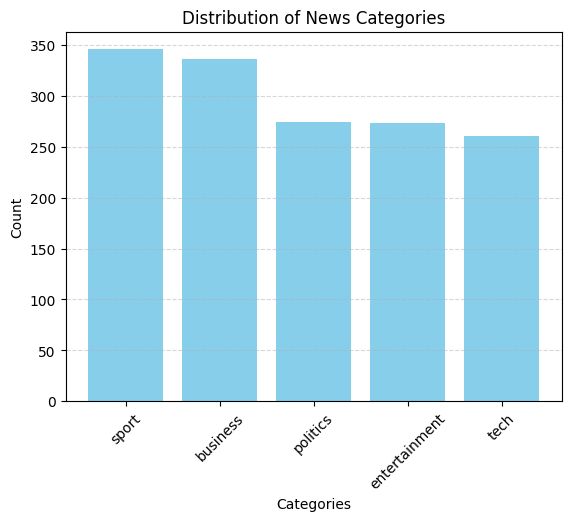

In [7]:
category_counts = df['Category'].value_counts()
#Plot the class distribution
plt.Figure(figsize=(8,6))
plt.bar(category_counts.index,category_counts.values,color='skyblue')
plt.xticks(rotation=45)
plt.xlabel("Categories")
plt.ylabel("Count")
plt.title("Distribution of News Categories")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [8]:
# Tokenizer Example
text = "ram is a bad boy"
words = word_tokenize(text)
print(words)

['ram', 'is', 'a', 'bad', 'boy']


In [9]:
category_name = y.unique()
print(category_name)

['business' 'tech' 'politics' 'sport' 'entertainment']


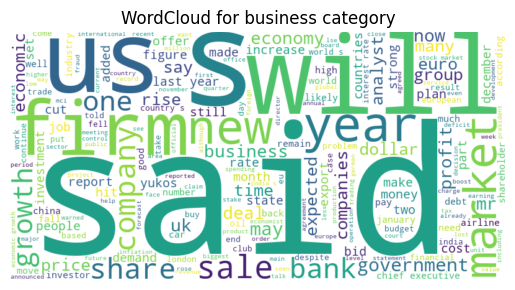

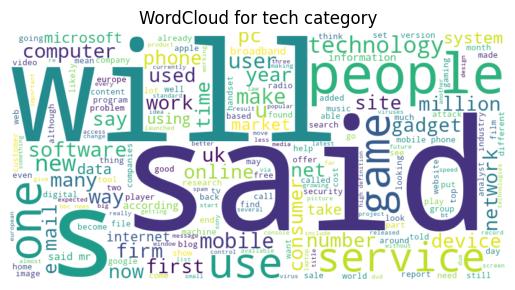

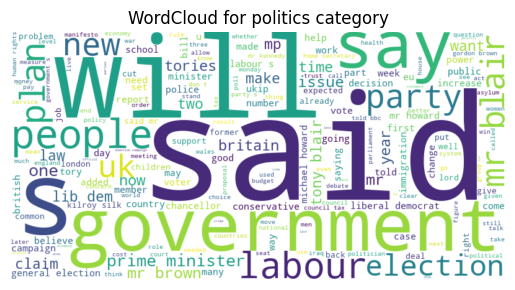

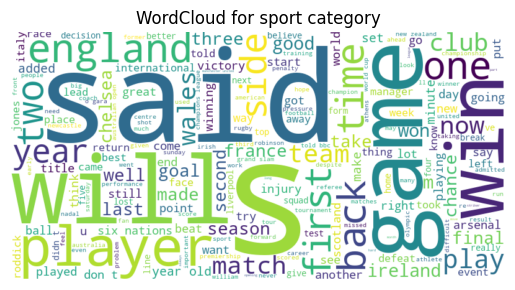

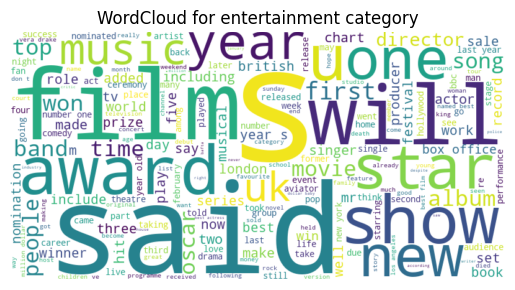

In [10]:
for category in category_name:
    text = "".join(df[df['Category']==category]['Text'].values)
    wordcloud = WordCloud(width=800, height=400,background_color='white').generate(text)
    plt.Figure(figsize=(8,4))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.title(f'WordCloud for {category} category')
    plt.axis('off')
    plt.savefig(f'WordCloud for {category} category')
    plt.show()

In [11]:
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\itzab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\itzab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\itzab\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\itzab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [12]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
print(stop_words)

{'why', "that'll", 'because', 'doing', 'those', 'our', "mustn't", 'same', 'from', "they've", 'mustn', 'than', 'them', 'ours', 'weren', 'which', 'itself', "should've", 'your', 'isn', "he's", 'when', "hasn't", 'now', 'of', 'did', 'been', "wasn't", 'me', 'more', "it's", 'his', 'having', "i'll", 'other', 'him', 'has', 'only', 'her', 'but', "we'll", "i've", 'nor', 'to', 'about', 'herself', 'not', 'does', "we'd", 'doesn', 'll', 'aren', "you'd", "she'd", "mightn't", 'over', 'their', 'any', 'my', 'by', 'how', "don't", "isn't", 'himself', 'some', 'haven', 'here', 'if', 'too', 'hadn', 'is', 'that', 'these', "shouldn't", "won't", "you'll", "it'd", 'there', "she's", 'just', 'shan', 'until', 'they', 'during', 'ma', 'am', 'couldn', 'yours', 'under', 'between', 'have', "doesn't", 'own', 'we', 'where', 'myself', 'she', "we're", "they're", 'won', 'hers', "he'll", 'are', 'so', 'each', 'in', 'both', 'yourselves', "i'd", 'can', 'most', 'had', 'was', 'm', "we've", 'as', 'y', 'what', 'out', 'd', 'themselves

In [13]:
lemmatizer.lemmatize(word='sleeping',pos='v')

'sleep'

In [14]:
text = "Ram is a good boy"
words = word_tokenize(text)
print(words)

['Ram', 'is', 'a', 'good', 'boy']


In [15]:
import re
def preprocess_text(text):
    #Lowercasing
    text = text.lower()
    # Remove special characters and punctation
    text = re.sub(r'[^a-zA-Z\s]','',text)
    # Totenization
    words = word_tokenize(text)
    #Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # Join back into a string
    return " ".join(words)

In [16]:
text = "Hey there ✌️ It's so good to see you : ) !!"
print(preprocess_text(text))

hey good see


In [17]:
# Apply preprocessing function to the dataset
df['Text'] = df['Text'].apply(preprocess_text)


In [18]:
X = df['Text']
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [20]:
from sklearn.pipeline import make_pipeline
nb_model = make_pipeline(TfidfVectorizer(stop_words='english'),MultinomialNB())
nb_model.fit(X_train,y_train)
y_preds = nb_model.predict(X_test)
print(f'Accuracy = {accuracy_score(y_test,y_preds)*100}')
print(f'classification Report \n {classification_report(y_test,y_preds)}')

Accuracy = 96.30872483221476
classification Report 
                precision    recall  f1-score   support

     business       0.96      0.97      0.97        75
entertainment       1.00      0.98      0.99        46
     politics       0.91      0.95      0.93        56
        sport       0.97      1.00      0.98        63
         tech       0.98      0.91      0.95        58

     accuracy                           0.96       298
    macro avg       0.97      0.96      0.96       298
 weighted avg       0.96      0.96      0.96       298



In [22]:
# Make prediction on unseen data 
new_texts = {
    'The latest football match ended in a draw, with great performances from both Liverpool and Arsen',
    'The government announced new environmental polices aimed at reducing pollution levels.'
}
new_preds = nb_model.predict(new_texts)
for text, preds in zip(new_texts,new_preds):
    print(f'Text:{text}\nPredicited Category:{preds}')

Text:The latest football match ended in a draw, with great performances from both Liverpool and Arsen
Predicited Category:sport
Text:The government announced new environmental polices aimed at reducing pollution levels.
Predicited Category:politics


In [23]:
import joblib
joblib.dump(nb_model,'nb_model.pkl')
print("SUCESS👍")

SUCESS👍
